In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller,acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv("Gold_data.csv",parse_dates=['date'], index_col='date')
data

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75
...,...
2021-12-17,4394.40
2021-12-18,4389.50
2021-12-19,4389.50


In [ ]:
data.shape

(2182, 1)

In [ ]:
data.ndim

2

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
list(data)

['price']

In [ ]:
data.head()

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2182 entries, 2016-01-01 to 2021-12-21
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2182 non-null   float64
dtypes: float64(1)
memory usage: 34.1 KB


In [ ]:
data.isnull().sum()

price    0
dtype: int64

In [ ]:
data.describe()

,price
count,2182.000000
mean,3284.450046
std,719.564434
min,2252.600000
25%,2697.020000
50%,2879.800000
75%,4147.325000
max,4966.300000


Text(0.5, 1.0, 'Trend of the Time Series')

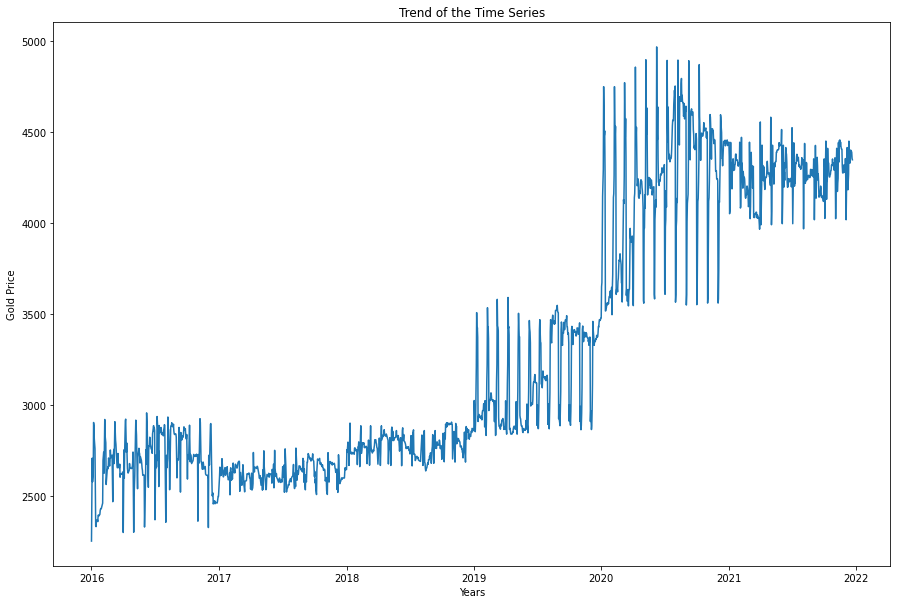

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(data)
plt.xlabel('Years')
plt.ylabel('Gold Price')
plt.title('Trend of the Time Series')

# Yearwise

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  after removing the cwd from sys.path.


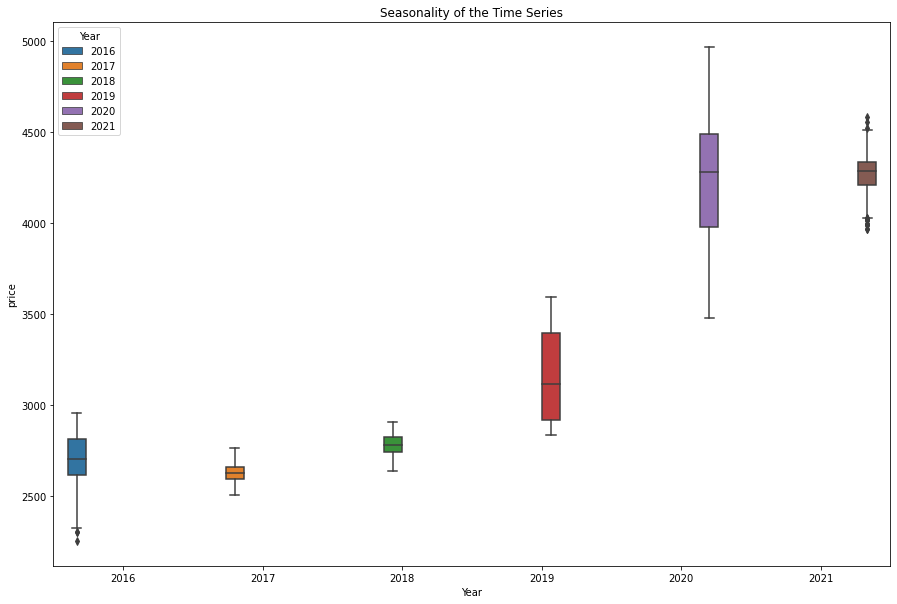

In [ ]:
data_temp = data.copy()
data_temp['Year'] = pd.DatetimeIndex(data_temp.index).year
data_temp['Month'] = pd.DatetimeIndex(data_temp.index).month
data_temp['Weeks'] = pd.DatetimeIndex(data_temp.index).week

# Stacked line plot
plt.figure(figsize=(15,10))
plt.title('Seasonality of the Time Series')
sns.boxplot(x='Year',y='price',hue='Year',data=data_temp)

We are having outliers in the year 2016 and 2021.

# Monthwise

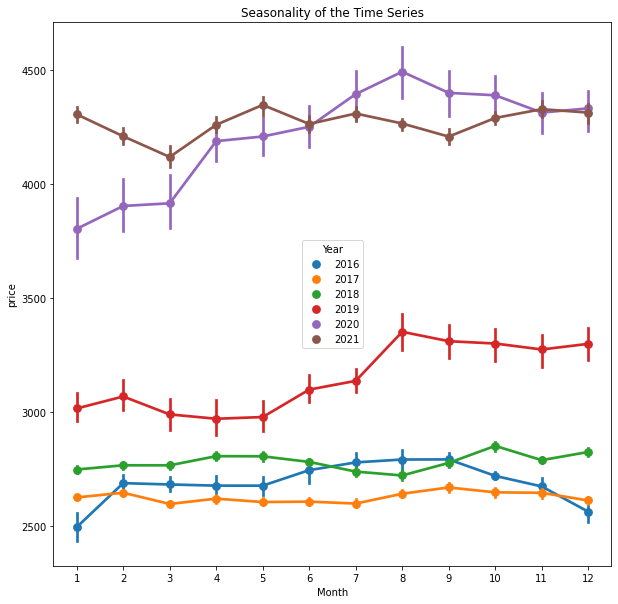

In [ ]:
# To plot the seasonality we are going to create a temp dataframe and add columns for Month and Year values
data_temp = data.copy()
data_temp['Year'] = pd.DatetimeIndex(data_temp.index).year
data_temp['Month'] = pd.DatetimeIndex(data_temp.index).month
data_temp['Weeks'] = pd.DatetimeIndex(data_temp.index).week
# Stacked line plot
plt.figure(figsize=(10,10))
plt.title('Seasonality of the Time Series')
sns.pointplot(x='Month',y='price',hue='Year',data=data_temp)

Seasonality: pirce is maximum in the month of August and minimum in the month of march generally.
First four years price ranges between 2500-3000 whereas in last two years there is a sudden hike in the price and it ranges from 4000-4500


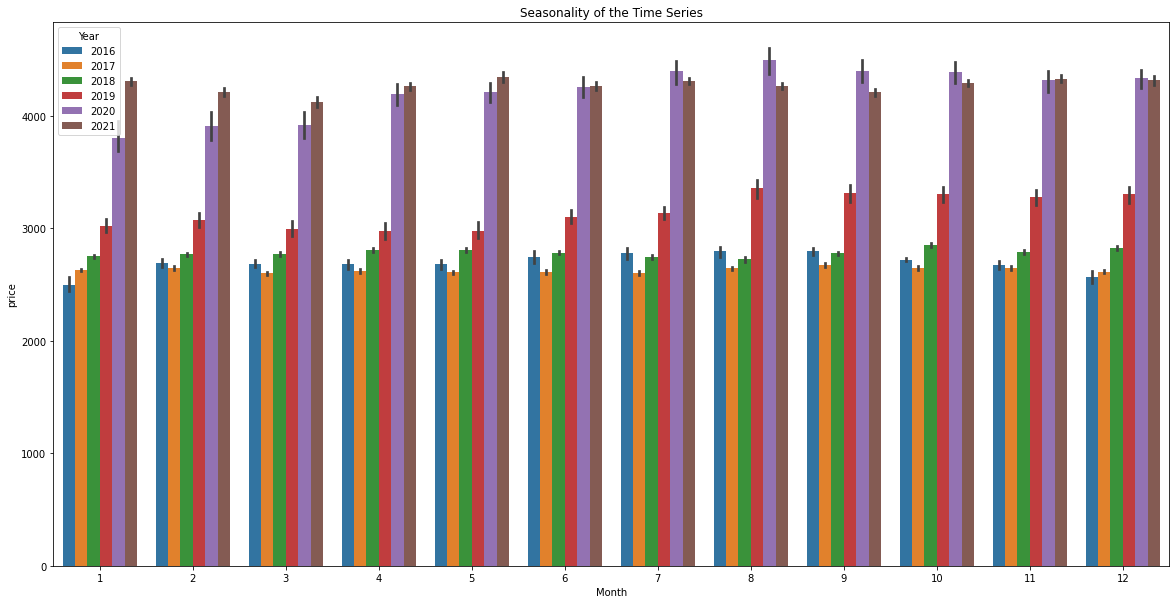

In [ ]:
# To plot the seasonality we are going to create a temp dataframe and add columns for Month and Year values
data_temp = data.copy()
data_temp['Year'] = pd.DatetimeIndex(data_temp.index).year
data_temp['Month'] = pd.DatetimeIndex(data_temp.index).month
#data_temp['Weeks'] = pd.DatetimeIndex(data_temp.index).week
#data_temp['Day'] = pd.DatetimeIndex(data_temp.index).day
# Stacked line plot
plt.figure(figsize=(20,10))
plt.title('Seasonality of the Time Series')
sns.barplot(x='Month',y='price',hue='Year',data=data_temp)

# Additive Decomposition


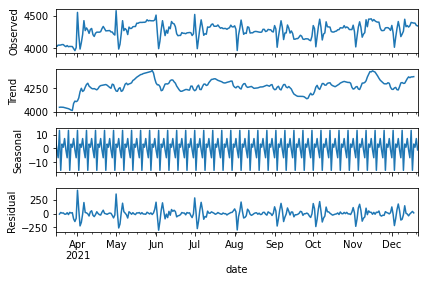

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data.price.iloc[1900:2182], model='additive') 
fig = decomposition.plot()
plt.rcParams['figure.figsize'] = (30, 15)

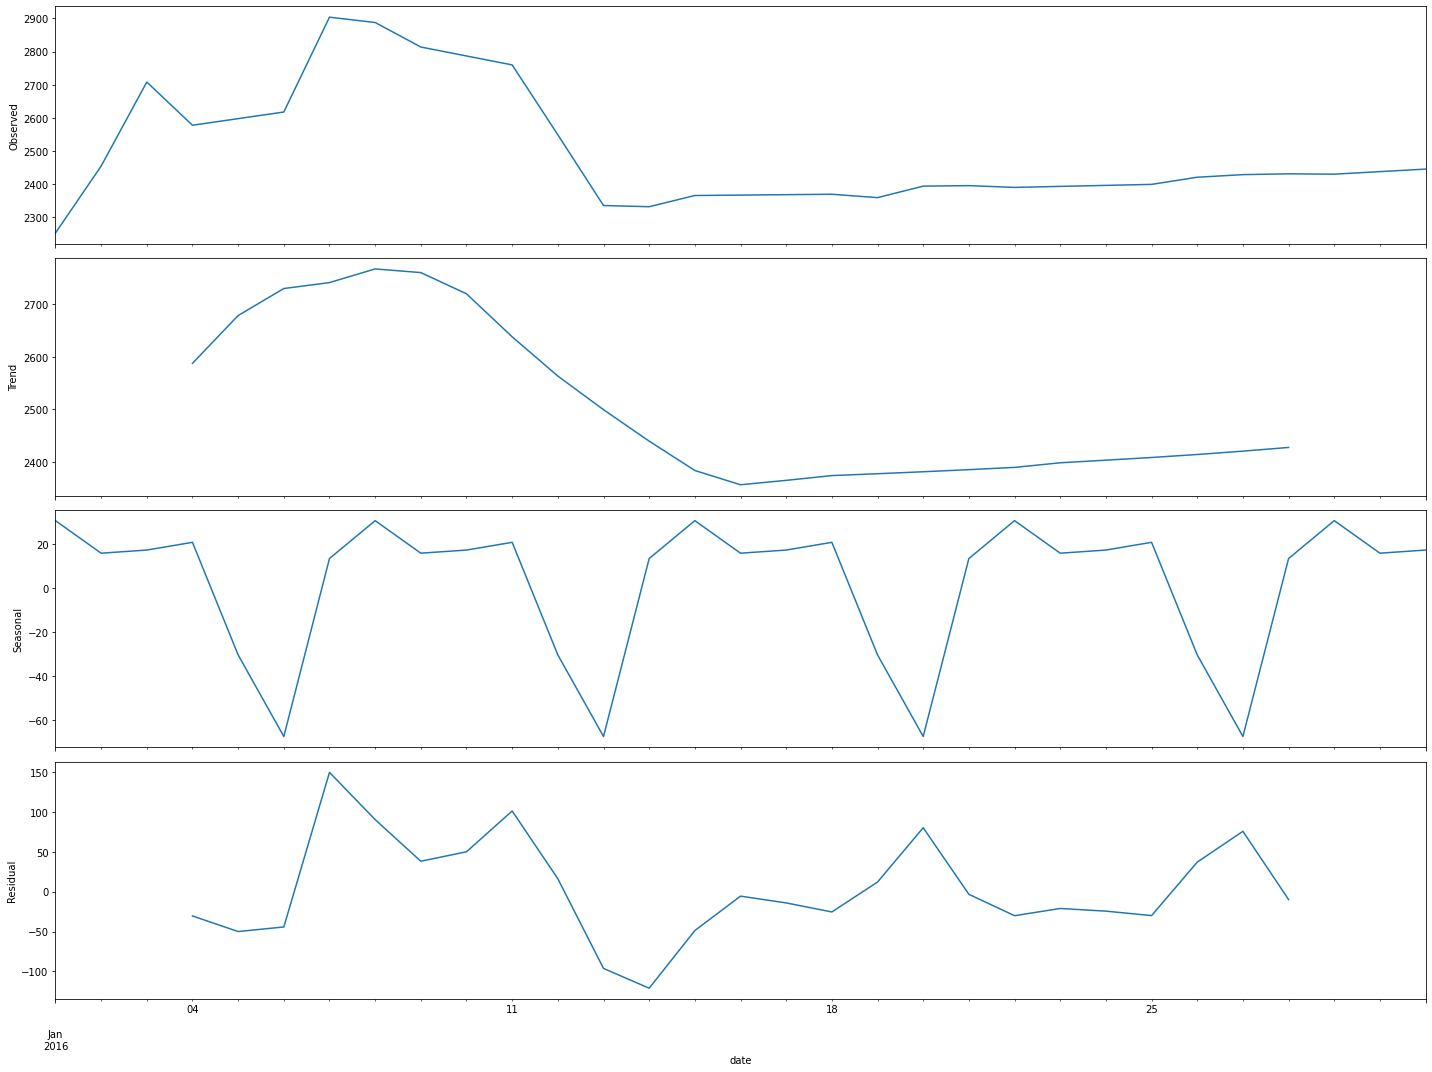

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data.price.iloc[:31], model='additive') 
fig = decomposition.plot()
plt.rcParams['figure.figsize'] = (20, 8)

# ADFuller Test for stationarity

In [ ]:
adf = adfuller(data["price"])[1]
print(f"p value:{adf.round(4)}", ", Series is Stationary" if adf <0.05 else ", Series is Non-Stationary")

p value:0.9241 , Series is Non-Stationary


# Differencing

p value:0.0 , Series is Stationary


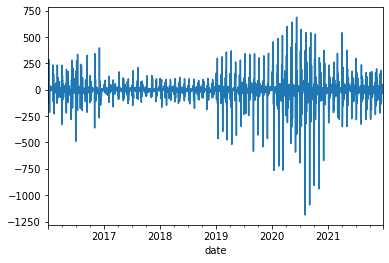

In [ ]:
de_trended = data['price'].diff(1).dropna()
adf2 = adfuller(de_trended)[1]
print(f"p value:{adf2}", ", Series is Stationary" if adf2 <0.05 else ", Series is Non-Stationary")
de_trended.plot()

ACF Plots

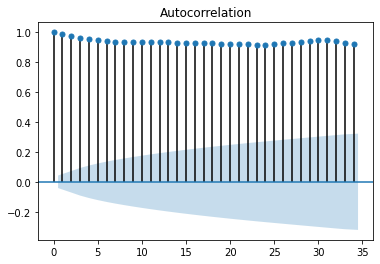

<Figure size 2880x720 with 0 Axes>

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data)
plt.figure(figsize = (40,10))
plt.show()

ACF plots tells us how many moving average (MA) to be taken to remove autocorrelation in a stationarised series. So here we can clearly see that only one spike is out of this blue region (significance region), so we take MA/q=1

# ACF Plot after Differencing

# PACF Plots

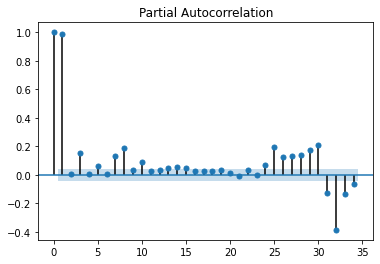

<Figure size 2880x720 with 0 Axes>

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data)
plt.figure(figsize = (40,10))
plt.show()

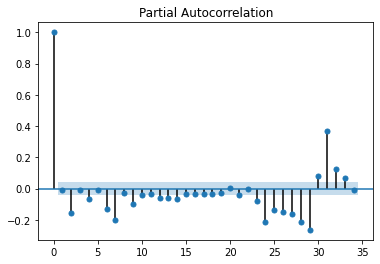

<Figure size 2880x720 with 0 Axes>

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(de_trended)
plt.figure(figsize = (40,10))
plt.show()

# ARIMA Model

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,1 ARIMA Model
model = ARIMA(data.price, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                 2181
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -13326.934
Method:                       css-mle   S.D. of innovations            108.996
Date:                Tue, 26 Jul 2022   AIC                          26661.867
Time:                        15:49:53   BIC                          26684.617
Sample:                    01-02-2016   HQIC                         26670.184
                         - 12-21-2021                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.8329      0.313      2.662      0.008       0.220       1.446
ar.L1.D.price     0.7811      0.015     51.012      0.000       0.751       0.811
ma.L1.D.price    -0.9711      0.005   -2

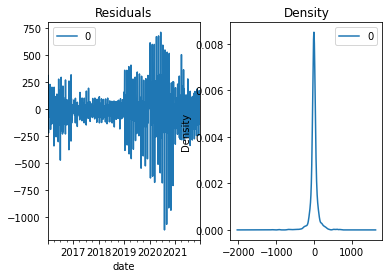

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

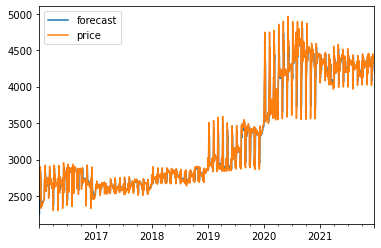

In [ ]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

# Grid Search





In [ ]:
# grid search ARIMA parameters for time series
from math import sqrt
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	rmse = sqrt(mean_squared_error(test, predictions))
	return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

# evaluate parameters
p_values = [0, 1, 2, 4,]
d_values = range(0, 3)
q_values = range(0, 3)
evaluate_models(data.price, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=1187.719
ARIMA(0, 0, 1) RMSE=646.313
ARIMA(0, 1, 0) RMSE=160.048
ARIMA(0, 1, 1) RMSE=160.259
ARIMA(0, 1, 2) RMSE=156.820
ARIMA(0, 2, 0) RMSE=227.363
ARIMA(0, 2, 1) RMSE=160.190
ARIMA(1, 0, 0) RMSE=160.887
ARIMA(1, 0, 1) RMSE=161.101
ARIMA(1, 0, 2) RMSE=157.973
ARIMA(1, 1, 0) RMSE=160.232
ARIMA(1, 1, 1) RMSE=153.225
ARIMA(1, 1, 2) RMSE=152.002
ARIMA(1, 2, 0) RMSE=210.138
ARIMA(2, 0, 0) RMSE=161.078
ARIMA(2, 0, 2) RMSE=152.259
ARIMA(2, 1, 0) RMSE=157.391
ARIMA(2, 1, 1) RMSE=152.293
ARIMA(2, 2, 0) RMSE=189.411
ARIMA(4, 0, 0) RMSE=158.614
ARIMA(4, 0, 1) RMSE=153.889
ARIMA(4, 1, 0) RMSE=157.622
ARIMA(4, 1, 1) RMSE=151.821
ARIMA(4, 2, 0) RMSE=175.739
Best ARIMA(4, 1, 1) RMSE=151.821


In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# 4,1,1 ARIMA Model
model = ARIMA(data.price, order=(4,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                 2181
Model:                 ARIMA(4, 1, 1)   Log Likelihood              -13299.646
Method:                       css-mle   S.D. of innovations            107.636
Date:                Tue, 26 Jul 2022   AIC                          26613.293
Time:                        18:23:40   BIC                          26653.106
Sample:                    01-02-2016   HQIC                         26627.847
                         - 12-21-2021                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.8331      0.315      2.648      0.008       0.216       1.450
ar.L1.D.price     0.8695      0.022     39.616      0.000       0.827       0.913
ar.L2.D.price    -0.1661      0.028     

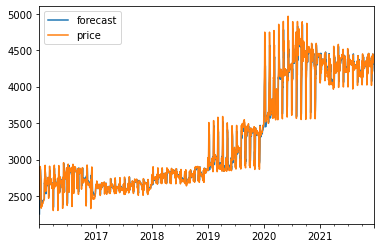

<Figure size 1200x500 with 0 Axes>

In [ ]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.figure(figsize=(12,5), dpi=100)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = data.price[:1745]
test = data.price[1745:]

In [ ]:
pred = best_model.forecast(len(test))
preda = pd.Series(pred, index=test.index)
resi = test - preda

NameError: ignored

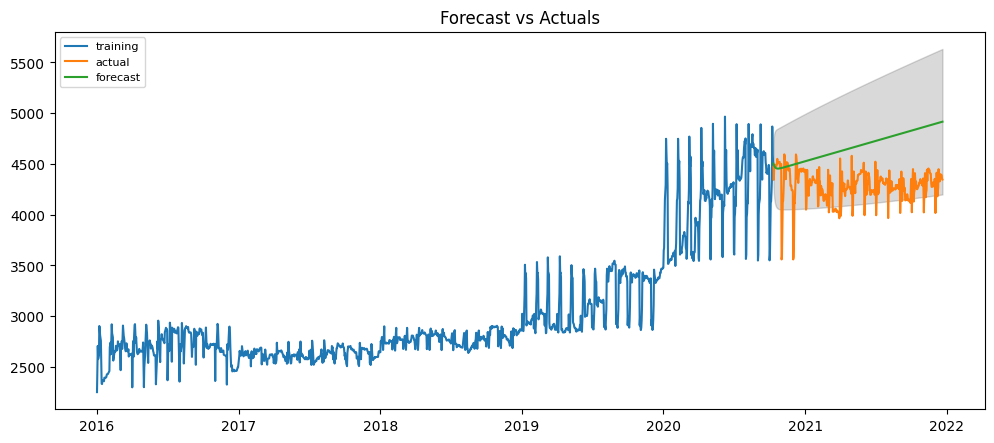

In [ ]:
# Build Model
model = ARIMA(train, order=(4, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(437, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

{'acf1': 0.8473928475593838,
 'corr': -0.07626915620802652,
 'mae': 398.41369607481835,
 'mape': 0.0943184301963841,
 'me': 392.24433308858977,
 'minmax': 0.08435994081606013,
 'mpe': 0.09295775028218549,
 'rmse': 444.688499508572}

# SARIMA

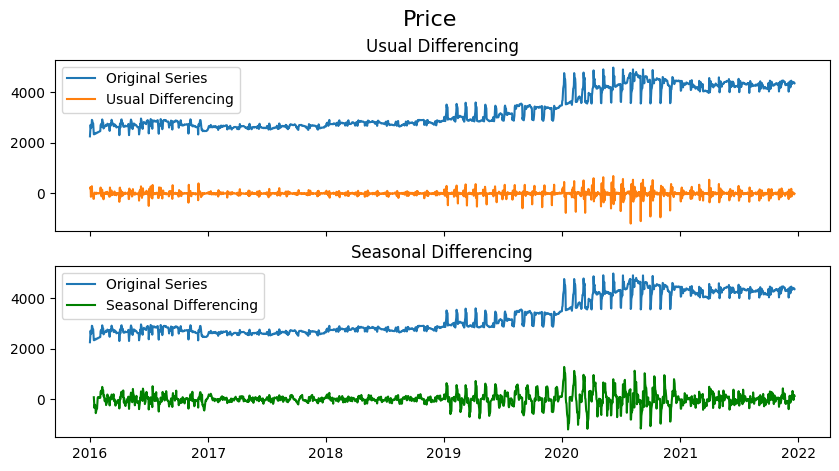

In [ ]:
# Import
data = pd.read_csv('Gold_data.csv', parse_dates=['date'], index_col='date')

# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(data[:], label='Original Series')
axes[0].plot(data[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(data[:], label='Original Series')
axes[1].plot(data[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Price', fontsize=16)
plt.show()

In [ ]:
!pip3 install pyramid-arima
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=15.85 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=30087.384, Time=0.16 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=27570.060, Time=4.99 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=27640.623, Time=7.47 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=30088.517, Time=0.11 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=28013.885, Time=0.35 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=27243.538, Time=15.23 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=49.10 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=16.71 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=29332.626, Time=20.21 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=27193.401, Time=36.90 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=27530.619, Time=7.01 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=62.59 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=19.40 sec
 ARIMA(3,0,0)(2,1,0)[12] in

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 2182
Model:             SARIMAX(2, 0, 1)x(2, 1, [], 12)   Log Likelihood              -13575.834
Date:                             Tue, 26 Jul 2022   AIC                          27165.668
Time:                                     13:00:42   BIC                          27205.446
Sample:                                          0   HQIC                         27180.213
                                            - 2182                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.1500      0.997      2.157      0.031       0.196       4.104
ar.L1          1.5621      0.052     30.191      0.000       1.461       1.663
ar.L2         -0.6646      0.037    -18.051      0.000      -0.737      -0.592
ma.L1         -0.6912      0.060    -11.469      0.000      -0.809      -0.573
ar.S.L12      -0.6175      0.012    -50.726      0.000      -0.641      -0.594
ar.S.L24      -0.3796      0.011    -33.862      0.000      -0.402      -0.358
sigma2      1.584e+04    193.069     82.063      0.000    1.55e+04    1.62e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.46   Jarque-Bera (JB):             28367.18
Prob(Q):                              0.50   Prob(JB):                         0.00
Heteroskedasticity (H):               4.92   Skew:                            -1.23
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = data.price[:1745]
test = data.price[1745:]

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [ ]:
best_model = SARIMAX(train, order=(1, 0, 1), seasonal_order=(2, 1, 0, 12)).fit(dis=-1)
print(best_model.summary())

                                 Statespace Model Results                                 
Dep. Variable:                              price   No. Observations:                 1745
Model:             SARIMAX(1, 0, 1)x(2, 1, 0, 12)   Log Likelihood              -10858.308
Date:                            Thu, 28 Jul 2022   AIC                          21726.615
Time:                                    10:23:36   BIC                          21753.904
Sample:                                01-01-2016   HQIC                         21736.708
                                     - 10-10-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7382      0.013     58.878      0.000       0.714       0.763
ma.L1          0.1968      0.024   

In [ ]:
pred = best_model.forecast(len(test))
preda = pd.Series(pred, index=test.index)
resi = test - preda

In [ ]:
print('RMSE:',np.sqrt(np.mean(resi**2)))

RMSE: 247.6669449113033


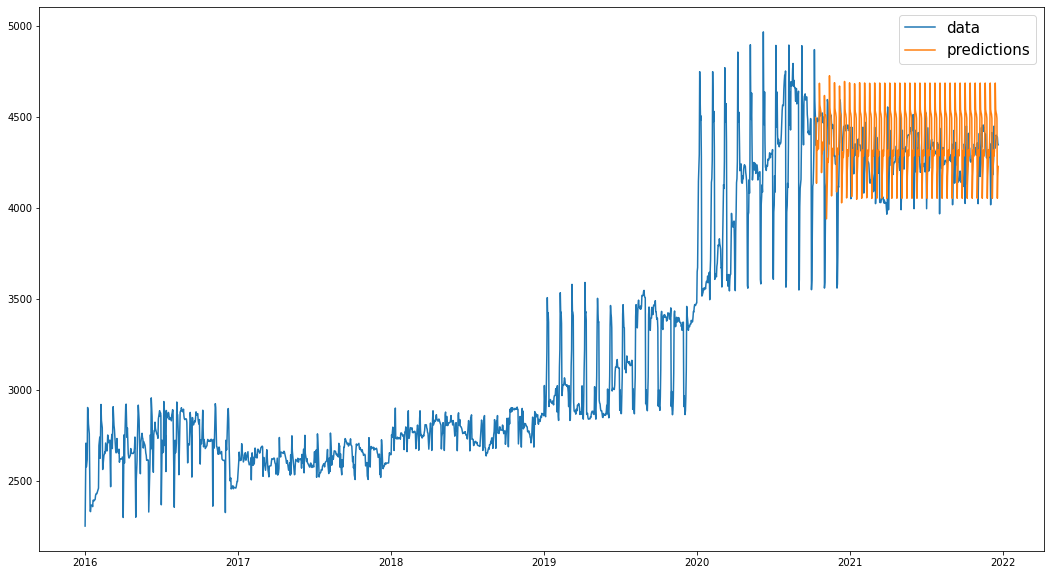

In [ ]:
plt.figure(figsize=(18,10))

plt.plot(data)
plt.plot(preda)
plt.legend(('data','predictions'),fontsize=15)


# SMA - Simple Moving Averages

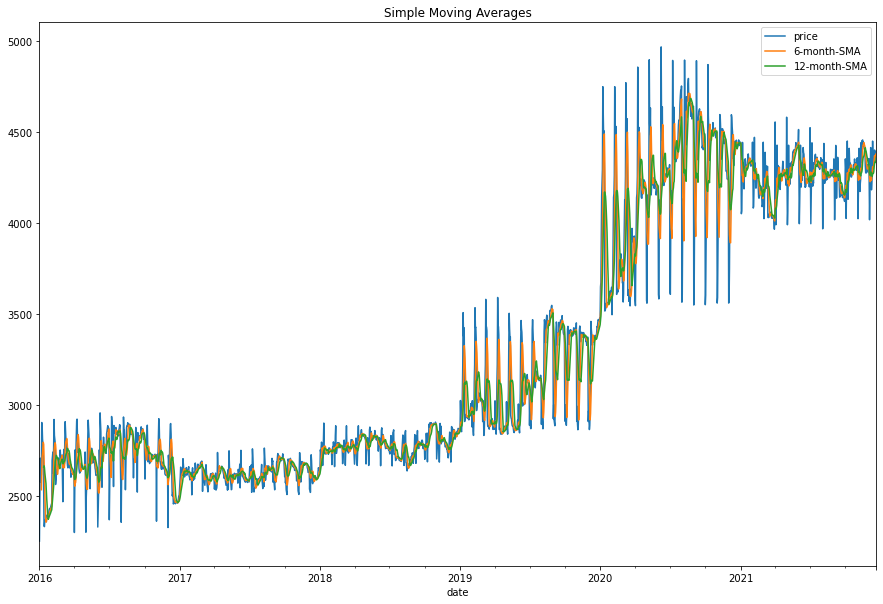

In [ ]:
data['6-month-SMA'] = data['price'].rolling(window=6).mean()
data['12-month-SMA'] = data['price'].rolling(window=12).mean()
data.plot(title='Simple Moving Averages',figsize=(15,10));

# EWMA - Exponentially Weighted Moving Average

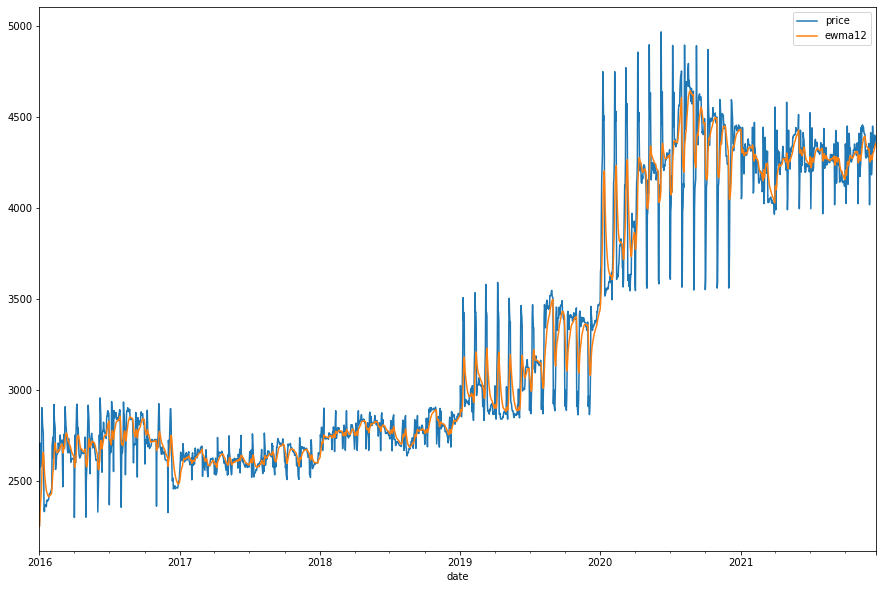

In [ ]:
data['ewma12'] = data['price'].ewm(span=12,adjust=False).mean()
data[['price','ewma12']].plot(figsize=(15,10));

# Comparing SMA to EWMA

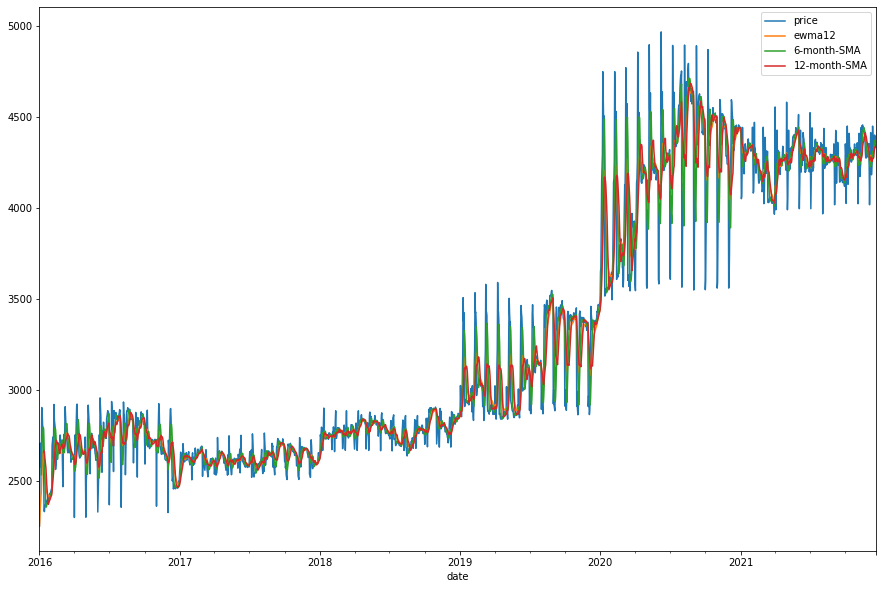

In [ ]:
data[['price','ewma12','6-month-SMA','12-month-SMA']].plot(figsize=(15,10));

# Holt-Winters

In [ ]:
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

m = 52
alpha = 1/(2*m)

# Single Smoothening

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


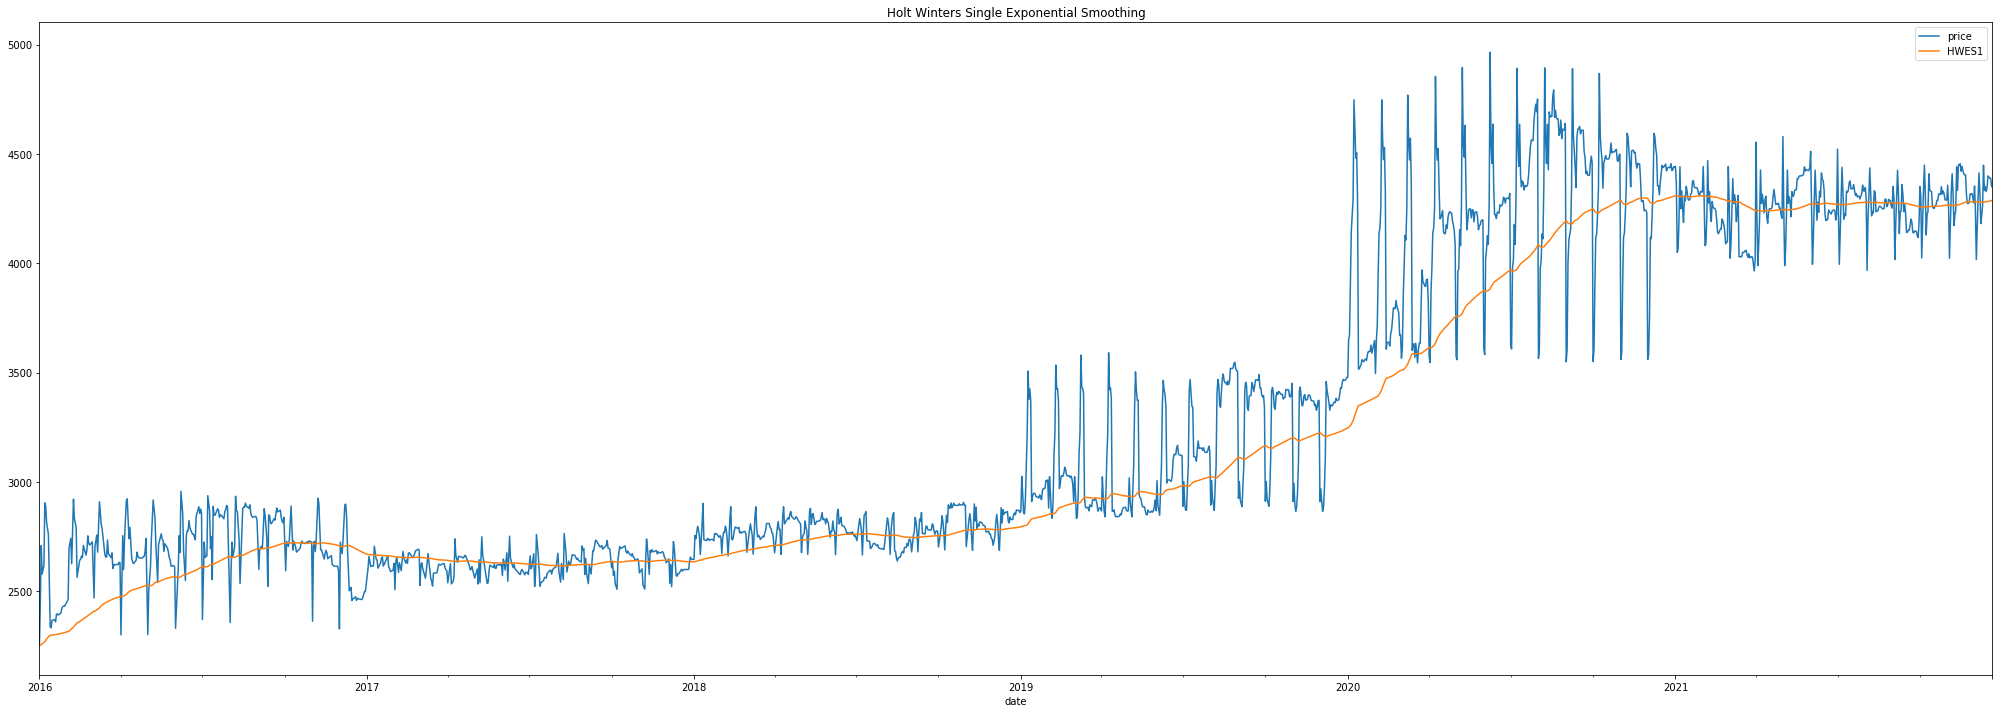

In [ ]:
data['HWES1'] = SimpleExpSmoothing(data['price']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
data[['price','HWES1']].plot(title='Holt Winters Single Exponential Smoothing',figsize=(35,12));

# Double Smoothening

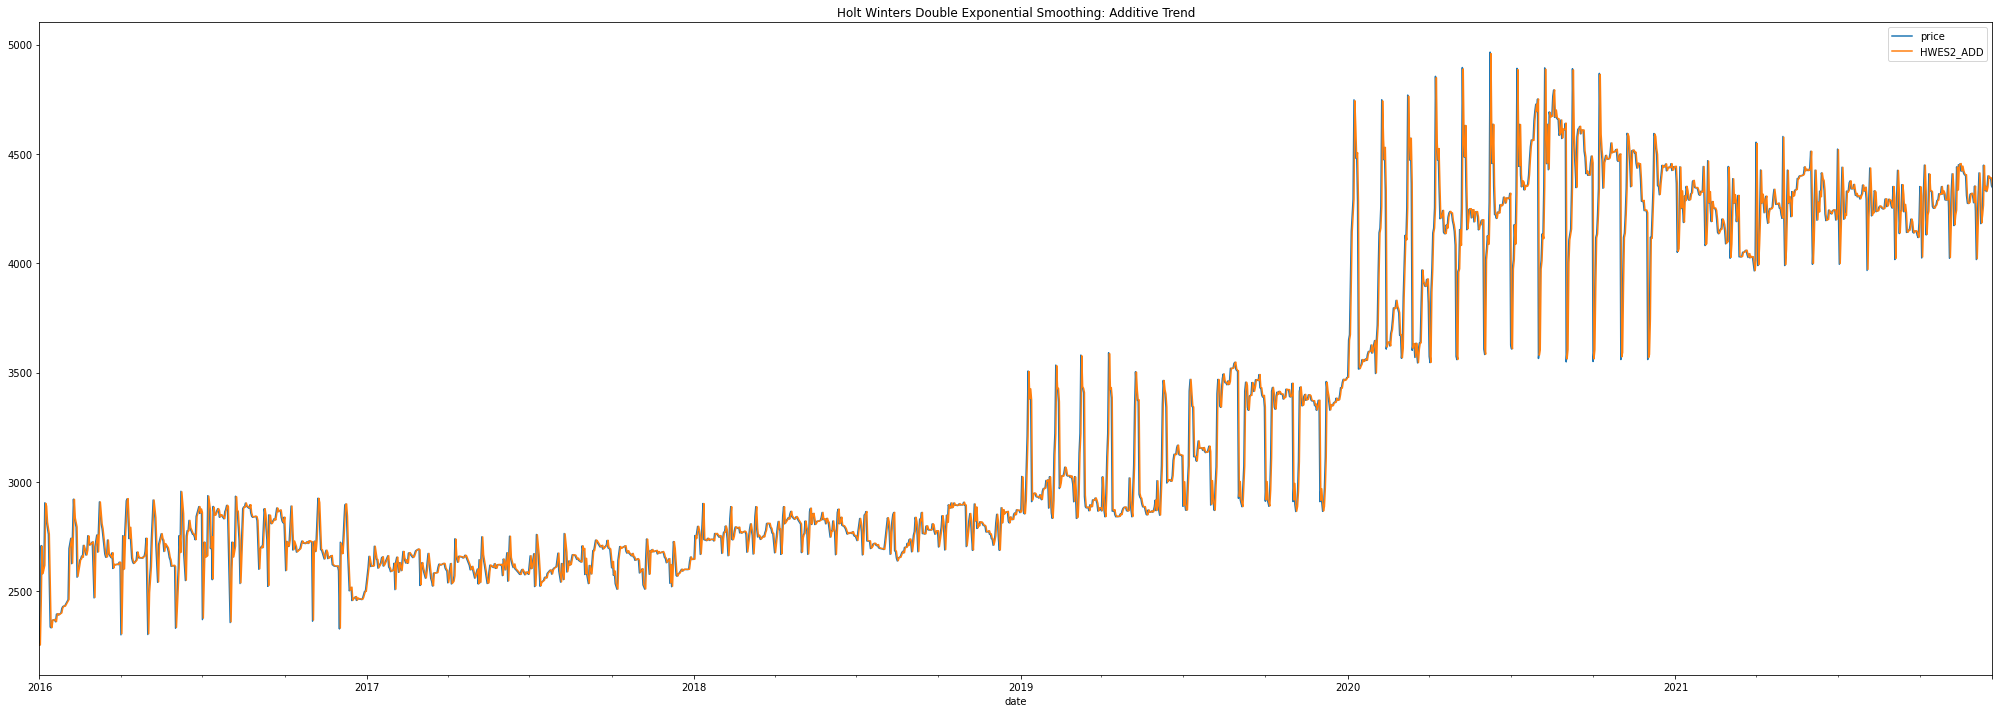

In [ ]:
import warnings
warnings.filterwarnings("ignore")
data['HWES2_ADD'] = ExponentialSmoothing(data['price'],trend='add').fit().fittedvalues
data[['price','HWES2_ADD']].plot(title='Holt Winters Double Exponential Smoothing: Additive Trend', figsize=(35,12));

# Triple Smoothening

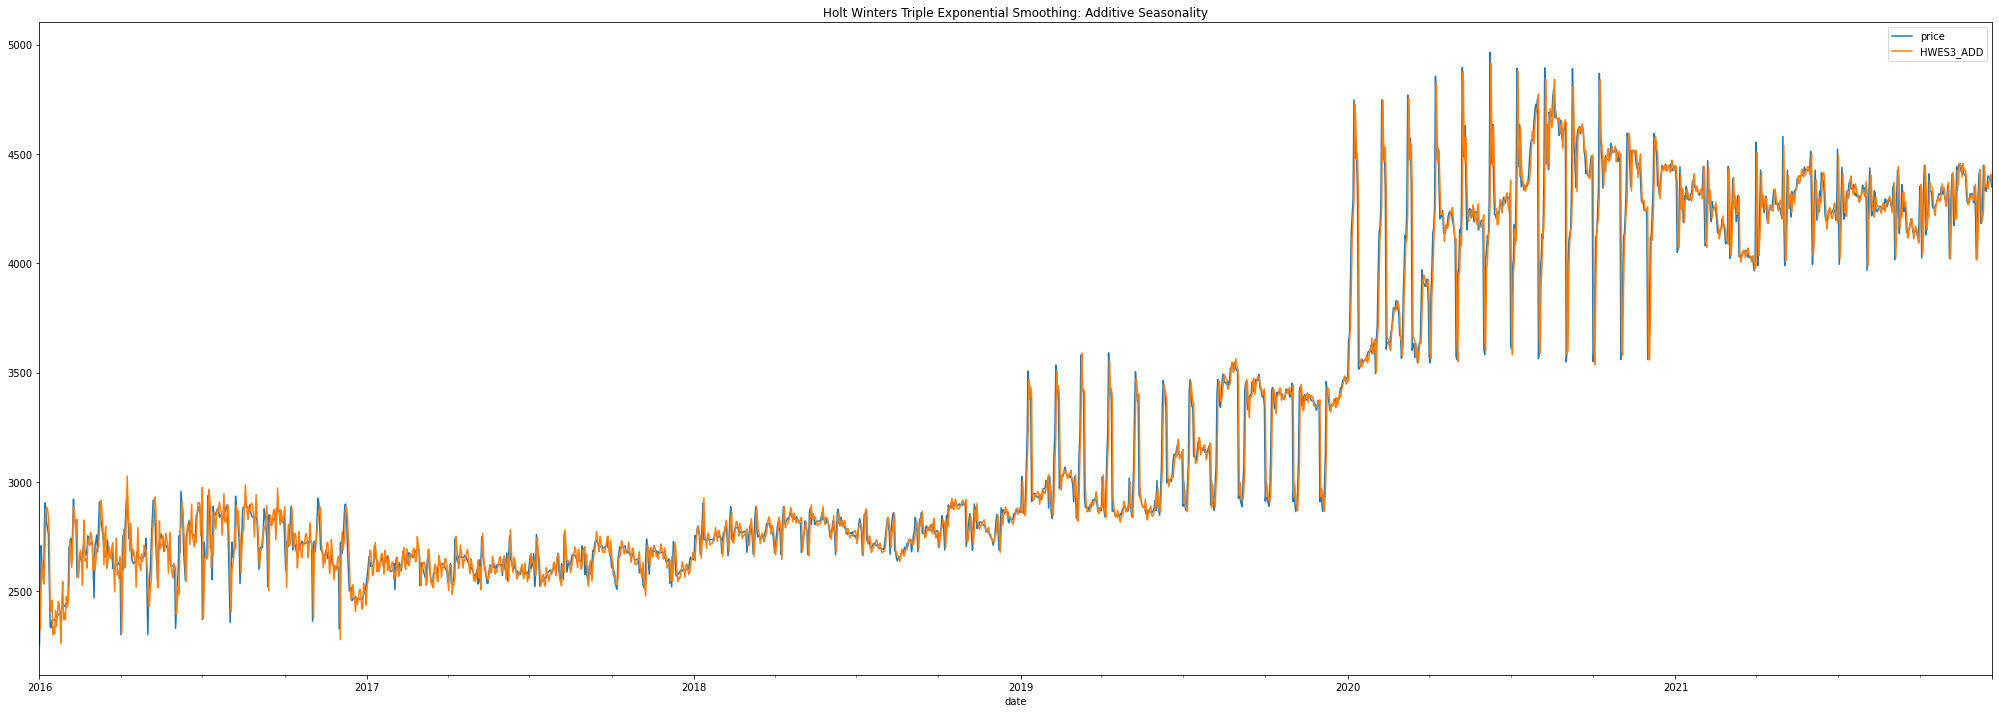

In [ ]:
import warnings
warnings.filterwarnings("ignore")
data['HWES3_ADD'] = ExponentialSmoothing(data['price'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
data[['price','HWES3_ADD']].plot(title='Holt Winters Triple Exponential Smoothing: Additive Seasonality',figsize=(35,12));


# Train & Test

Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

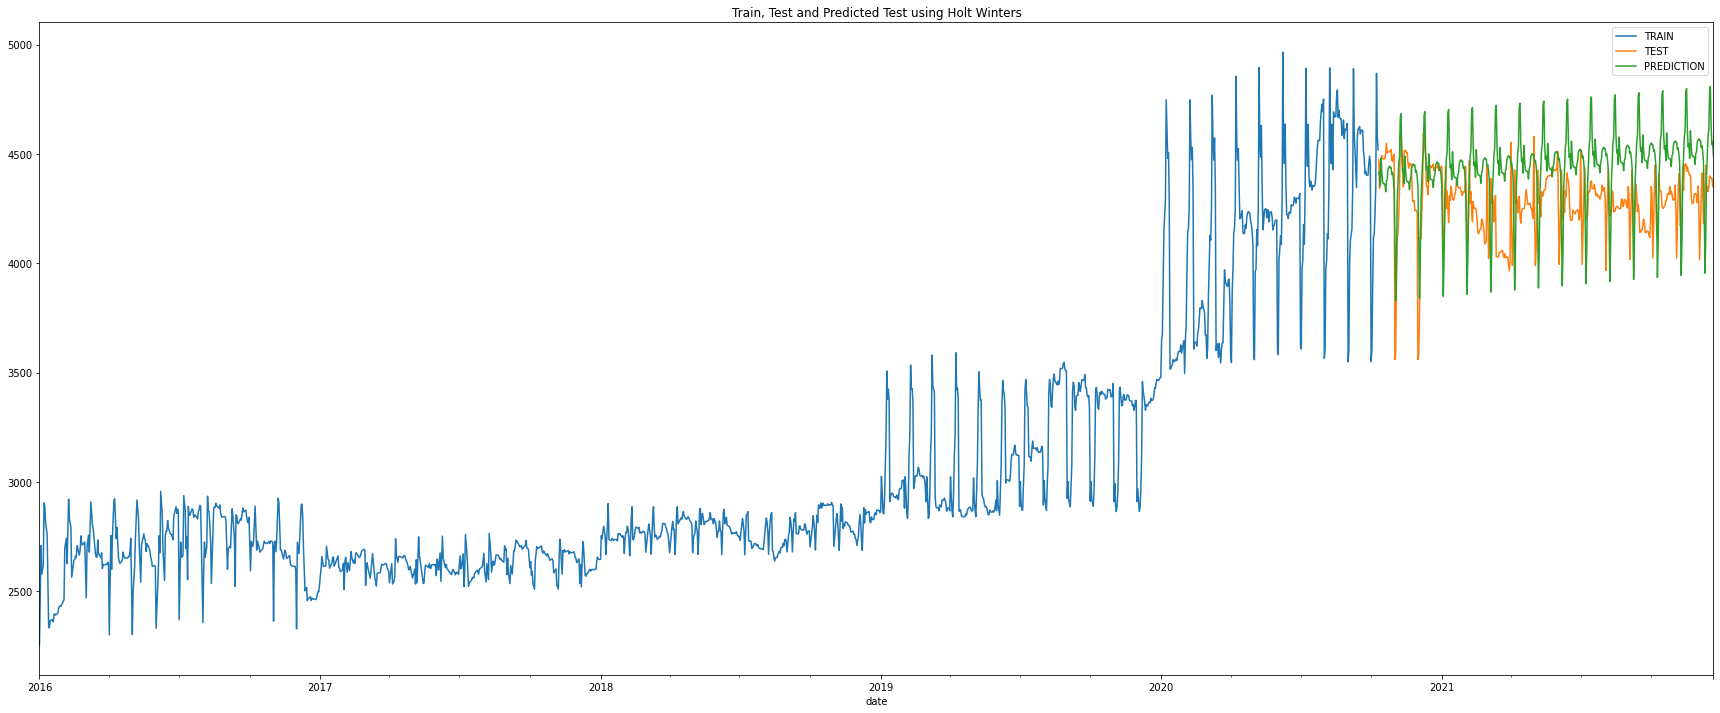

In [ ]:
train_data = data[:1745]
test_data = data[1745:]

fitted_model = ExponentialSmoothing(train_data['price'],trend='add',seasonal='add',seasonal_periods=31).fit()
test_predictions = fitted_model.forecast(437)
train_data['price'].plot(legend=True,label='TRAIN')
test_data['price'].plot(legend=True,label='TEST',figsize=(30,12))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')

# Prediction Model

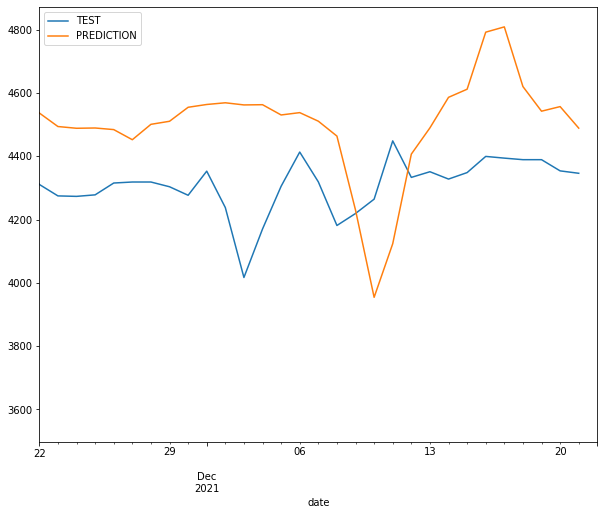

In [ ]:
test_data['price'].plot(legend=True,label='TEST',figsize=(10,8))
test_predictions.plot(legend=True,label='PREDICTION',xlim=['2021-11-22','2021-12-22']);

# Checking Mean Square Error

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
from math import sqrt

print(f'Mean Absolute Error = {mean_absolute_error(test_data,test_predictions)}')
print(f'Mean Squared Error = {mean_squared_error(test_data,test_predictions)}')
print(f'Root Mean Squared Error = {sqrt(mean_squared_error(test_data,test_predictions))}')

Mean Absolute Error = 210.12055135733988
Mean Squared Error = 62843.41825918397
Root Mean Squared Error = 250.68589561278466


# Weekly Analysis

In [ ]:
data  = pd.read_csv('/Gold_data.csv',index_col='date',parse_dates=True)
data.index

data.index = pd.to_datetime(data.index)
data = data.resample('1W').mean()
data.index
data.head()

len(data)

313

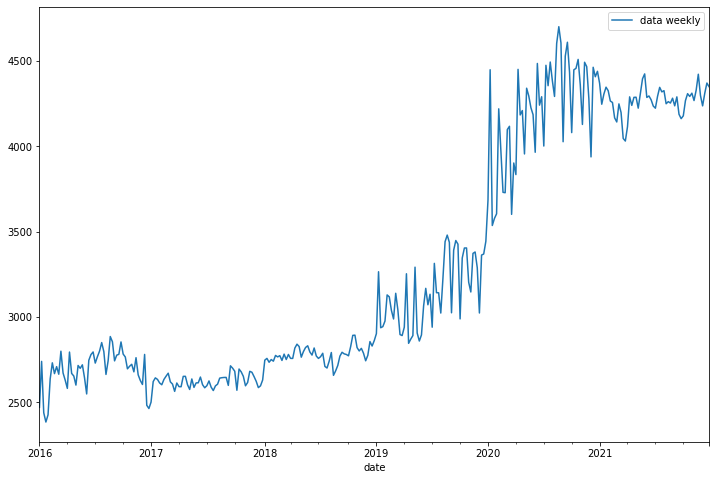

In [ ]:
data[:15]
data['price'].plot(legend=True,label='data weekly',figsize=(12,8))

In [ ]:
train_data = data[:200] 
test_data = data[199:] 

len(test_data)

114

In [ ]:
fitted_model = ExponentialSmoothing(train_data['price'],trend='add',seasonal='add',seasonal_periods=52).fit()

In [ ]:
test_predictions = fitted_model.forecast(125).rename('HW Test Forecast')

In [ ]:
test_predictions[:15]

2019-11-03    3275.340092
2019-11-10    3301.473562
2019-11-17    3287.067565
2019-11-24    3261.304431
2019-12-01    3229.342820
2019-12-08    3294.577025
2019-12-15    3196.193083
2019-12-22    3179.918215
2019-12-29    3220.588884
2020-01-05    3335.273893
2020-01-12    3355.698465
2020-01-19    3238.634199
2020-01-26    3246.958951
2020-02-02    3297.542870
2020-02-09    3372.493669
Freq: W-SUN, Name: HW Test Forecast, dtype: float64

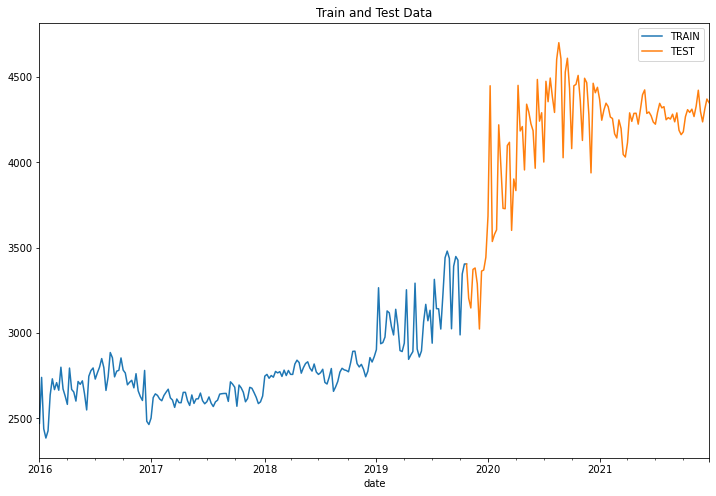

In [ ]:
train_data['price'].plot(legend=True,label='TRAIN')
test_data['price'].plot(legend=True,label='TEST',figsize=(12,8))
plt.title('Train and Test Data');

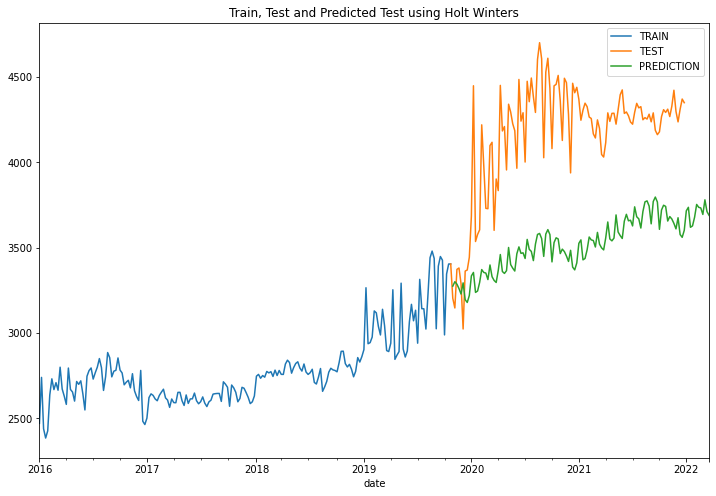

In [ ]:
train_data['price'].plot(legend=True,label='TRAIN')
test_data['price'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters');